In [ ]:
!git clone https://github.com/swapniel99/ezio.git

Cloning into 'ezio'...
remote: Enumerating objects: 198, done.
remote: Counting objects: 100% (198/198), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 198 (delta 71), reused 105 (delta 23), pack-reused 0
Receiving objects: 100% (198/198), 1.05 MiB | 10.49 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [ ]:
%cd ezio

/content/ezio


In [ ]:
import torch
# import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import torchvision.transforms as transforms

!pip install torchsummary
from torchsummary import summary

from ezio.data import dataset 
#from ezio.model.session_7 import model as model_arch
from ezio.runner import engine
from ezio.utils import loss

In [ ]:
## Create train and test transforms
train_transforms = transforms.Compose(
    [transforms.RandomAffine(7, (0.1, 0.1), (0.9, 1.1), 7),
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.ToTensor(),
     transforms.Normalize((0.49139968, 0.48215841, 0.44653091), (0.24703223, 0.24348513, 0.26158784))])

test_transforms = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.49139968, 0.48215841, 0.44653091), (0.24703223, 0.24348513, 0.26158784))])

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [ ]:
train_set, valid_set = dataset.cifar10_dataset(train_transforms, test_transforms)

Extracting ./datasets/cifar-10-python.tar.gz to ./datasets
Files already downloaded and verified


In [ ]:
train_loader, valid_loader = dataset.create_loaders(train_set, valid_set, train_batch_size=32, valid_batch_size=32, num_workers=4)

In [ ]:
from ezio.model.session_8.model import ResNet18
model = ResNet18().to(device)

In [ ]:
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=0, verbose=True, factor=0.5)
loss_function = loss.cross_entropy_loss()

In [ ]:
train_acc, train_losses, test_acc, test_losses = engine.fit(model, train_loader, valid_loader, loss_function, device, optimizer, 25, scheduler)

  0%|          | 0/1563 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.9991647005081177 Batch_id=1562 Accuracy=44.00: 100%|██████████| 1563/1563 [00:55<00:00, 27.92it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0379, Accuracy: 5723/10000 (57.23%)

EPOCH: 2


Loss=0.8372381329536438 Batch_id=1562 Accuracy=63.00: 100%|██████████| 1563/1563 [00:55<00:00, 28.24it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0331, Accuracy: 6587/10000 (65.87%)

EPOCH: 3


Loss=0.8333480954170227 Batch_id=1562 Accuracy=71.00: 100%|██████████| 1563/1563 [00:55<00:00, 28.23it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0217, Accuracy: 7590/10000 (75.90%)

EPOCH: 4


Loss=0.5039876103401184 Batch_id=1562 Accuracy=75.00: 100%|██████████| 1563/1563 [00:55<00:00, 28.10it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0189, Accuracy: 7915/10000 (79.15%)

EPOCH: 5


Loss=0.9140105247497559 Batch_id=1562 Accuracy=78.00: 100%|██████████| 1563/1563 [00:55<00:00, 28.36it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Accuracy: 8174/10000 (81.74%)

EPOCH: 6


Loss=0.9180140495300293 Batch_id=1562 Accuracy=80.00: 100%|██████████| 1563/1563 [00:55<00:00, 28.03it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0152, Accuracy: 8338/10000 (83.38%)

EPOCH: 7


Loss=0.5965651869773865 Batch_id=1562 Accuracy=82.00: 100%|██████████| 1563/1563 [00:55<00:00, 28.00it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0141, Accuracy: 8504/10000 (85.04%)

EPOCH: 8


Loss=0.7540447115898132 Batch_id=1562 Accuracy=83.00: 100%|██████████| 1563/1563 [00:55<00:00, 28.36it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0139, Accuracy: 8452/10000 (84.52%)

EPOCH: 9


Loss=0.18975023925304413 Batch_id=1562 Accuracy=84.00: 100%|██████████| 1563/1563 [00:55<00:00, 28.15it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0129, Accuracy: 8634/10000 (86.34%)

EPOCH: 10


Loss=0.46632492542266846 Batch_id=1562 Accuracy=85.00: 100%|██████████| 1563/1563 [00:55<00:00, 28.39it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0121, Accuracy: 8673/10000 (86.73%)

EPOCH: 11


Loss=0.6663932204246521 Batch_id=1562 Accuracy=86.00: 100%|██████████| 1563/1563 [00:56<00:00, 27.44it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0125, Accuracy: 8636/10000 (86.36%)

Epoch    11: reducing learning rate of group 0 to 5.0000e-03.
EPOCH: 12


Loss=0.9105323553085327 Batch_id=1562 Accuracy=89.00: 100%|██████████| 1563/1563 [00:54<00:00, 28.75it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0103, Accuracy: 8890/10000 (88.90%)

EPOCH: 13


Loss=0.11750353127717972 Batch_id=1562 Accuracy=90.00: 100%|██████████| 1563/1563 [00:54<00:00, 28.46it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0097, Accuracy: 9000/10000 (90.00%)

EPOCH: 14


Loss=0.3184886574745178 Batch_id=1562 Accuracy=90.00: 100%|██████████| 1563/1563 [00:55<00:00, 28.30it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0098, Accuracy: 8965/10000 (89.65%)

Epoch    14: reducing learning rate of group 0 to 2.5000e-03.
EPOCH: 15


Loss=0.10728346556425095 Batch_id=1562 Accuracy=92.00: 100%|██████████| 1563/1563 [00:54<00:00, 28.54it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0090, Accuracy: 9076/10000 (90.76%)

EPOCH: 16


Loss=0.1141449362039566 Batch_id=1562 Accuracy=92.00: 100%|██████████| 1563/1563 [00:55<00:00, 28.41it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0089, Accuracy: 9047/10000 (90.47%)

EPOCH: 17


Loss=0.09826682507991791 Batch_id=1562 Accuracy=92.00: 100%|██████████| 1563/1563 [00:56<00:00, 27.81it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0092, Accuracy: 9042/10000 (90.42%)

Epoch    17: reducing learning rate of group 0 to 1.2500e-03.
EPOCH: 18


Loss=0.23818697035312653 Batch_id=1562 Accuracy=93.00: 100%|██████████| 1563/1563 [00:55<00:00, 28.41it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 9101/10000 (91.01%)

EPOCH: 19


Loss=0.24874933063983917 Batch_id=1562 Accuracy=93.00: 100%|██████████| 1563/1563 [00:55<00:00, 28.20it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 9101/10000 (91.01%)

EPOCH: 20


Loss=0.3850068747997284 Batch_id=1562 Accuracy=94.00: 100%|██████████| 1563/1563 [00:55<00:00, 28.24it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 9119/10000 (91.19%)

EPOCH: 21


Loss=0.4354510009288788 Batch_id=1562 Accuracy=94.00: 100%|██████████| 1563/1563 [00:55<00:00, 28.33it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 9132/10000 (91.32%)

Epoch    21: reducing learning rate of group 0 to 6.2500e-04.
EPOCH: 22


Loss=0.1952553689479828 Batch_id=1562 Accuracy=94.00: 100%|██████████| 1563/1563 [00:55<00:00, 28.10it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 9135/10000 (91.35%)

Epoch    22: reducing learning rate of group 0 to 3.1250e-04.
EPOCH: 23


Loss=0.06602926552295685 Batch_id=1562 Accuracy=94.00: 100%|██████████| 1563/1563 [00:55<00:00, 28.29it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 9166/10000 (91.66%)

EPOCH: 24


Loss=0.0447753369808197 Batch_id=1562 Accuracy=95.00: 100%|██████████| 1563/1563 [00:55<00:00, 27.93it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 9161/10000 (91.61%)

Epoch    24: reducing learning rate of group 0 to 1.5625e-04.
EPOCH: 25


Loss=0.0798327699303627 Batch_id=1562 Accuracy=95.00: 100%|██████████| 1563/1563 [00:55<00:00, 28.11it/s]



Test set: Average loss: 0.0084, Accuracy: 9182/10000 (91.82%)



[[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa827914e0>


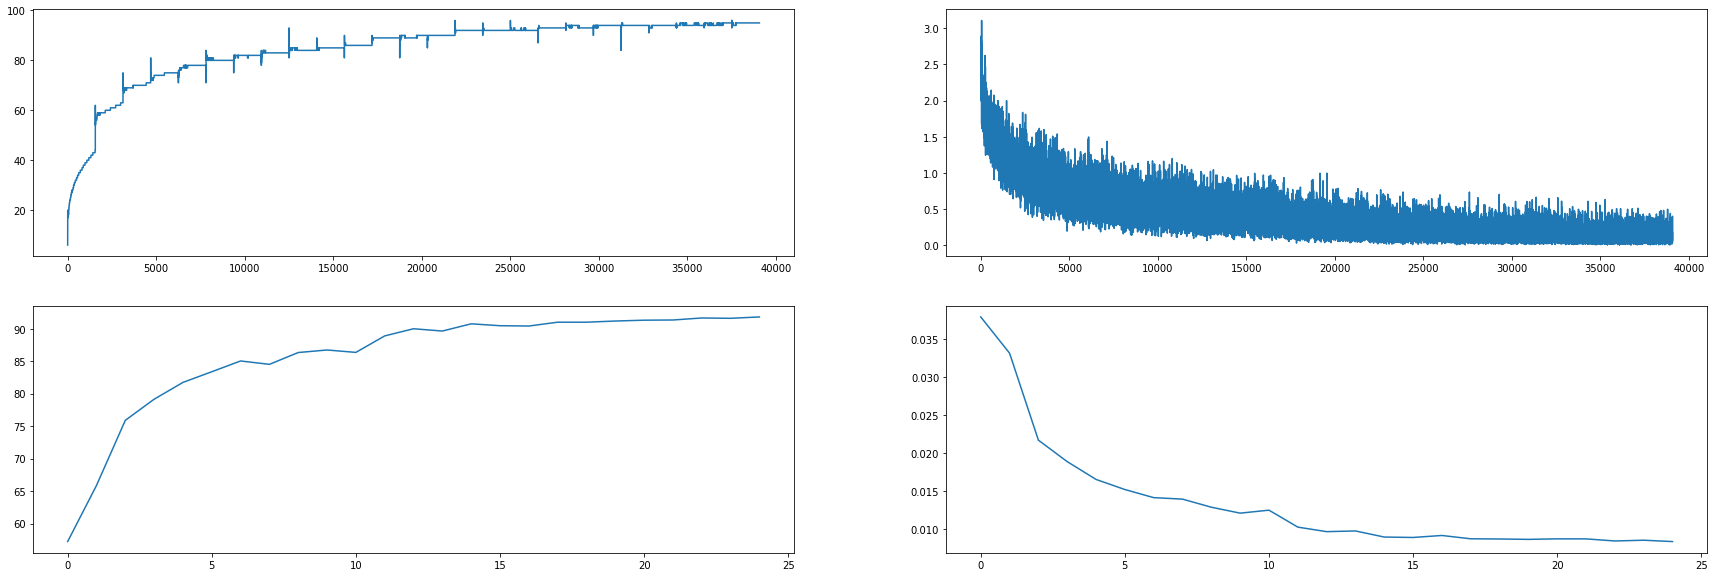

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(30,10))
print(axs)
axs[0][0].plot(train_acc, label = "train_acc")
axs[0][1].plot(train_losses, label = "train_losses")
axs[1][0].plot(test_acc, label = "test_acc")
axs[1][1].plot(test_losses, label = "test_losses")
# axs[0].legend()
# axs[0].set_title("Training Loss")